In [1]:
from pycaret.classification import *
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\NT550-052\OneDrive\바탕 화면\ASAC\프로젝트\ML\web_crawling\CGW\modeling\modeling_data\onlyonehot\onlyonehot.csv",sep=";")
data.drop(columns="Unnamed: 0",inplace=True)
data

,appid,24_Hour_Peak,All_time_peak,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,genre,...,short,simulation,softwaretraining,sports,strategy,tutorial,utilities,videoproduction,violent,webpublishing
0,294100,20930,60742,12492,1401,5368,921,34.99,34.99,"Indie, Simulation, Strategy",...,0,1,0,0,1,0,0,0,0,0
1,960090,13428,53891,4018,277,1532,62,13.99,13.99,Strategy,...,0,0,0,0,1,0,0,0,0,0
2,504230,1234,4148,1316,310,370,582,19.99,19.99,"Action, Adventure, Indie",...,0,0,0,0,0,0,0,0,0,0
3,588650,4553,14880,1841,183,868,213,14.99,24.99,"Action, Adventure, Indie",...,0,0,0,0,0,0,0,0,0,0
4,264710,4205,50876,1943,313,941,277,29.99,29.99,"Adventure, Indie",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,1995280,0,0,0,0,0,0,14.99,14.99,"Adventure, Indie",...,0,0,0,0,0,0,0,0,0,0
46248,2098860,0,0,0,0,0,0,9.99,9.99,"Adventure, Casual",...,0,0,0,0,0,0,0,0,0,0
46249,2154770,814,1176,0,0,0,0,0.00,0.00,N,...,0,0,0,0,0,0,0,0,0,0
46250,1915410,0,1,0,0,0,0,2.99,2.99,"Action, Indie",...,0,0,0,0,0,0,0,0,0,0


In [6]:
# tag 데이터 불러오기 
tag_path = r"C:\Users\NT550-052\OneDrive\바탕 화면\ASAC\프로젝트\ML\web_crawling\merge_dataset\tag_merge.csv"
tag_df = pd.read_csv(tag_path)
tag_df

,appid,Cartoon,Hunting,Time Management,Zombies,Isometric,Chess,Musou,Experimental,3D,...,360 Video,Linear,Grid-Based Movement,FMV,Lemmings,Tile-Matching,Indie,Arcade,Atmospheric,Cats
0,294100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1223.0,0.0,0.0,0.0
1,960090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.0,...,0.0,0.0,0.0,0.0,0.0,0.0,161.0,0.0,0.0,0.0
2,504230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,887.0,0.0,320.0,0.0
3,588650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1003.0,0.0,3360.0,0.0
4,264710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1420.0,0.0,2618.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46718,1995280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46719,2098860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322.0,0.0
46720,2154770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46721,1915410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0


In [7]:
# tag 데이터 binary 변환 
tag_df.iloc[:,1:] = tag_df.iloc[:,1:].astype("bool")
tag_df.iloc[:,1:] = tag_df.iloc[:,1:].astype("int")

In [ ]:
data = pd.merge(data,tag_df,how="inner",left_on="appid",right_on="appid")

In [8]:
# tag 개수 컬럼 추가 
data["tag_num"] = tag_df.iloc[:,1:].sum(axis=1)

In [10]:
# 모델 학습에 불필요한 컬럼 제거 
data.drop(columns=["genre","appid"],inplace=True)

In [12]:
# 정답지 분리 
X = data.drop(columns="Review")
y = data["Review"]

In [13]:
# train, validation 분리 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 1234, # 옵션, 재현성을 위함 
    stratify = y # 옵션 : 비율 나눌 때 비율 유지할지 말지 
)

In [14]:
# train 데이터 조정 : pycaret에서 target으로 y_train 지정을 위함
X_train["Review"] = y_train.to_list()

In [17]:
# pycaret classification 객체 생성 
exp = ClassificationExperiment()

In [18]:
# setup : stratified kfold, target 불균형 해결을 위한 SMOTE 사용(fix_imbalance) 
exp.setup(X_train, target='Review', session_id=123, fold_strategy="stratifiedkfold",fix_imbalance=True)

,Description,Value
0,Session id,123
1,Target,Review
2,Target type,Binary
3,Target mapping,"Negative: 0, Positive: 1"
4,Original data shape,"(37001, 505)"
5,Transformed data shape,"(41153, 505)"
6,Transformed train set shape,"(30052, 505)"
7,Transformed test set shape,"(11101, 505)"
8,Numeric features,504
9,Preprocess,True


In [19]:
# val score가 높은 상위 5개 모델 저장 
best = exp.compare_models(n_select = 5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:57:53
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [20]:
best

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=123, verbose=0, warm_start=False),
 GradientBoostingClassifier(c

In [21]:
exp.pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7402,0.8051,0.6119,0.7266,0.6642,0.4549,0.4595,1.403
rf,Random Forest Classifier,0.7392,0.8006,0.5918,0.7355,0.6558,0.4498,0.4568,3.733
gbc,Gradient Boosting Classifier,0.7307,0.7889,0.5821,0.7229,0.6447,0.4319,0.4386,7.614
et,Extra Trees Classifier,0.7144,0.7675,0.5793,0.6907,0.6300,0.4003,0.4045,6.281
ada,Ada Boost Classifier,0.7137,0.7706,0.5932,0.6832,0.6349,0.4013,0.4042,3.082
ridge,Ridge Classifier,0.6681,0.0000,0.6295,0.5999,0.6143,0.3233,0.3237,0.933
lda,Linear Discriminant Analysis,0.6678,0.7185,0.6284,0.5997,0.6137,0.3226,0.3230,2.154
dt,Decision Tree Classifier,0.6514,0.6436,0.5921,0.5837,0.5878,0.2858,0.2859,1.469
lr,Logistic Regression,0.6506,0.6938,0.6056,0.5806,0.5926,0.2870,0.2874,3.332
knn,K Neighbors Classifier,0.6381,0.6711,0.5915,0.5661,0.5785,0.2618,0.2620,1.949


In [22]:
lgbm = best[0]
rf = best[1]
gbc = best[2]
et = best[3]
ada = best[4]

In [23]:
from sklearn.metrics import classification_report

In [24]:
prediction = exp.predict_model(rf, data = X_test)
b=rf.predict(X_test).astype("bool")
c=y_test.replace("Positive",1).replace("Negative",0)
print("rf tuning 전")
print(classification_report(c,b))
exp.save_model(rf, "rf_model_file")

rf tuning 전
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      5367
           1       0.74      0.61      0.67      3884

    accuracy                           0.75      9251
   macro avg       0.75      0.73      0.73      9251
weighted avg       0.75      0.75      0.74      9251

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\NT550-~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['24_Hour_Peak', 'All_time_peak',
                                              'average_forever',
                                              'average_2weeks', 'median_forever',
                                              'median_2weeks...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_child_weight=0.001,
                                 min_split_gain=

In [25]:
prediction = exp.predict_model(lgbm, data = X_test)
b=lgbm.predict(X_test).astype("bool")
c=y_test.replace("Positive",1).replace("Negative",0)
print("lgbm tuning 전")
print(classification_report(c,b))
exp.save_model(lgbm, "lgbm_model_file")

lgbm tuning 전
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      5367
           1       0.74      0.59      0.66      3884

    accuracy                           0.74      9251
   macro avg       0.74      0.72      0.73      9251
weighted avg       0.74      0.74      0.74      9251

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\NT550-~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['24_Hour_Peak', 'All_time_peak',
                                              'average_forever',
                                              'average_2weeks', 'median_forever',
                                              'median_2weeks...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_nodes=None, max_samples=None,
                                       

In [26]:
prediction = exp.predict_model(gbc, data = X_test)
b=gbc.predict(X_test).astype("bool")
c=y_test.replace("Positive",1).replace("Negative",0)
print("gbc tuning 전")
print(classification_report(c,b))
exp.save_model(gbc, "gbc_model_file")

gbc tuning 전
              precision    recall  f1-score   support

           0       0.74      0.84      0.78      5367
           1       0.73      0.58      0.65      3884

    accuracy                           0.73      9251
   macro avg       0.73      0.71      0.72      9251
weighted avg       0.73      0.73      0.73      9251

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\NT550-~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['24_Hour_Peak', 'All_time_peak',
                                              'average_forever',
                                              'average_2weeks', 'median_forever',
                                              'median_2weeks...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                                         

In [27]:
prediction = exp.predict_model(ada, data = X_test)
b=ada.predict(X_test).astype("bool")
c=y_test.replace("Positive",1).replace("Negative",0)
print("ada tuning 전")
print(classification_report(c,b))
exp.save_model(ada, "ada_model_file")

ada tuning 전
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      5367
           1       0.71      0.59      0.64      3884

    accuracy                           0.73      9251
   macro avg       0.72      0.71      0.71      9251
weighted avg       0.72      0.73      0.72      9251

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\NT550-~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['24_Hour_Peak', 'All_time_peak',
                                              'average_forever',
                                              'average_2weeks', 'median_forever',
                                              'median_2weeks...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_imp

In [28]:
prediction = exp.predict_model(et, data = X_test)
b=et.predict(X_test).astype("bool")
c=y_test.replace("Positive",1).replace("Negative",0)
print("et tuning 전")
print(classification_report(c,b))
exp.save_model(et, "et_model_file")

et tuning 전
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      5367
           1       0.69      0.60      0.64      3884

    accuracy                           0.72      9251
   macro avg       0.71      0.70      0.71      9251
weighted avg       0.72      0.72      0.72      9251

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\NT550-~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['24_Hour_Peak', 'All_time_peak',
                                              'average_forever',
                                              'average_2weeks', 'median_forever',
                                              'median_2weeks...
                                                                               n_jobs=None,
                                                                               random_state=None,
                                                                               sampling_strategy='auto')))),
                 ('clean_column_names',
        

In [29]:
# hyperparameter tuning : optuna

In [30]:
rf_tune = exp.tune_model(rf, search_library = 'optuna',n_iter = 20,choose_better = True)
b=rf_tune.predict(X_test).astype("bool")
print(classification_report(c,b))

exp.save_model(rf_tune, 'rf_tune_model')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:05:03
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7502,0.8067,0.6191,0.7428,0.6754,0.4751,0.4803
1,0.7336,0.8085,0.6053,0.7160,0.6560,0.4411,0.4453
2,0.7398,0.8142,0.6164,0.7228,0.6653,0.4546,0.4585
3,0.7483,0.8142,0.6412,0.7268,0.6813,0.4746,0.4772
4,0.7332,0.8043,0.6201,0.7080,0.6611,0.4427,0.4453
5,0.7301,0.7976,0.6357,0.6952,0.6641,0.4393,0.4405
6,0.7614,0.8362,0.6471,0.7505,0.6950,0.5008,0.5045
7,0.7529,0.8255,0.6434,0.7353,0.6863,0.4839,0.4869
8,0.7467,0.8122,0.6268,0.7318,0.6752,0.4697,0.4735


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7502,0.8067,0.6191,0.7428,0.6754,0.4751,0.4803
1,0.7336,0.8085,0.6053,0.7160,0.6560,0.4411,0.4453
2,0.7398,0.8142,0.6164,0.7228,0.6653,0.4546,0.4585
3,0.7483,0.8142,0.6412,0.7268,0.6813,0.4746,0.4772
4,0.7332,0.8043,0.6201,0.7080,0.6611,0.4427,0.4453
5,0.7301,0.7976,0.6357,0.6952,0.6641,0.4393,0.4405
6,0.7614,0.8362,0.6471,0.7505,0.6950,0.5008,0.5045
7,0.7529,0.8255,0.6434,0.7353,0.6863,0.4839,0.4869
8,0.7467,0.8122,0.6268,0.7318,0.6752,0.4697,0.4735


[I 2023-05-25 15:05:03,530] Searching the best hyperparameters using 25900 samples...
[I 2023-05-25 15:14:34,467] Finished hyperparemeter search!


              precision    recall  f1-score   support

           0       0.76      0.84      0.80      5367
           1       0.74      0.63      0.68      3884

    accuracy                           0.75      9251
   macro avg       0.75      0.74      0.74      9251
weighted avg       0.75      0.75      0.75      9251

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\NT550-~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['24_Hour_Peak', 'All_time_peak',
                                              'average_forever',
                                              'average_2weeks', 'median_forever',
                                              'median_2weeks...
                                 learning_rate=0.02819787899482023, max_depth=-1,
                                 min_child_samples=43, min_child_weight=0.001,
                                 min_split_gain=0.33545530702894366,
                                 n_estimators=219, n_jobs=-1, num_leaves=169,
                                 object

In [31]:
lgbm_tune = exp.tune_model(lgbm, search_library = 'optuna',n_iter = 20,choose_better = True)
b=lgbm_tune.predict(X_test).astype("bool")
print(classification_report(c,b))

exp.save_model(lgbm_tune, 'lgbm_tune_model')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:15:09
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7425,0.7948,0.5906,0.7431,0.6581,0.4559,0.4636
1,0.7208,0.7827,0.5722,0.7068,0.6324,0.4114,0.4174
2,0.7340,0.7990,0.5879,0.7261,0.6497,0.4391,0.4455
3,0.7259,0.7912,0.5925,0.7069,0.6446,0.4243,0.4287
4,0.7282,0.7889,0.5869,0.7144,0.6444,0.4278,0.4333
5,0.7305,0.7775,0.6219,0.7020,0.6595,0.4379,0.4401
6,0.7429,0.8077,0.5938,0.7425,0.6599,0.4572,0.4646
7,0.7413,0.8043,0.6103,0.7297,0.6647,0.4568,0.4616
8,0.7286,0.7932,0.5873,0.7156,0.6451,0.4288,0.4343


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7425,0.7948,0.5906,0.7431,0.6581,0.4559,0.4636
1,0.7208,0.7827,0.5722,0.7068,0.6324,0.4114,0.4174
2,0.7340,0.7990,0.5879,0.7261,0.6497,0.4391,0.4455
3,0.7259,0.7912,0.5925,0.7069,0.6446,0.4243,0.4287
4,0.7282,0.7889,0.5869,0.7144,0.6444,0.4278,0.4333
5,0.7305,0.7775,0.6219,0.7020,0.6595,0.4379,0.4401
6,0.7429,0.8077,0.5938,0.7425,0.6599,0.4572,0.4646
7,0.7413,0.8043,0.6103,0.7297,0.6647,0.4568,0.4616
8,0.7286,0.7932,0.5873,0.7156,0.6451,0.4288,0.4343


[I 2023-05-25 15:15:09,694] Searching the best hyperparameters using 25900 samples...
[I 2023-05-25 16:00:29,320] Finished hyperparemeter search!


(Pipeline(memory=FastMemory(location=C:\Users\NT550-~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['24_Hour_Peak', 'All_time_peak',
                                              'average_forever',
                                              'average_2weeks', 'median_forever',
                                              'median_2weeks...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_nodes=None, max_samples=None,
                                       

In [32]:
gbc_tune = exp.tune_model(gbc, search_library = 'optuna',n_iter = 20,choose_better = True)
b=gbc_tune.predict(X_test).astype("bool")
print(classification_report(c,b))

exp.save_model(gbc_tune, 'gbc_tune_model')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:01:51
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7498,0.8076,0.6173,0.7431,0.6744,0.4740,0.4794
1,0.7382,0.8101,0.6090,0.7235,0.6613,0.4506,0.4550
2,0.7440,0.8176,0.6283,0.7251,0.6732,0.4646,0.4678
3,0.7417,0.8120,0.6440,0.7128,0.6767,0.4625,0.4642
4,0.7378,0.8022,0.6375,0.7086,0.6712,0.4542,0.4560
5,0.7286,0.7984,0.6477,0.6875,0.6670,0.4383,0.4388
6,0.7625,0.8360,0.6562,0.7476,0.6990,0.5043,0.5072
7,0.7560,0.8248,0.6452,0.7405,0.6896,0.4901,0.4933
8,0.7486,0.8066,0.6369,0.7302,0.6804,0.4749,0.4779


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7498,0.8076,0.6173,0.7431,0.6744,0.4740,0.4794
1,0.7382,0.8101,0.6090,0.7235,0.6613,0.4506,0.4550
2,0.7440,0.8176,0.6283,0.7251,0.6732,0.4646,0.4678
3,0.7417,0.8120,0.6440,0.7128,0.6767,0.4625,0.4642
4,0.7378,0.8022,0.6375,0.7086,0.6712,0.4542,0.4560
5,0.7286,0.7984,0.6477,0.6875,0.6670,0.4383,0.4388
6,0.7625,0.8360,0.6562,0.7476,0.6990,0.5043,0.5072
7,0.7560,0.8248,0.6452,0.7405,0.6896,0.4901,0.4933
8,0.7486,0.8066,0.6369,0.7302,0.6804,0.4749,0.4779


[I 2023-05-25 16:01:51,247] Searching the best hyperparameters using 25900 samples...
[I 2023-05-25 16:49:35,844] Finished hyperparemeter search!


              precision    recall  f1-score   support

           0       0.76      0.84      0.80      5367
           1       0.74      0.64      0.68      3884

    accuracy                           0.75      9251
   macro avg       0.75      0.74      0.74      9251
weighted avg       0.75      0.75      0.75      9251

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\NT550-~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['24_Hour_Peak', 'All_time_peak',
                                              'average_forever',
                                              'average_2weeks', 'median_forever',
                                              'median_2weeks...
                                             loss='log_loss', max_depth=11,
                                             max_features=0.7182933122785164,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=5.894982764878127e-09,
                                     

In [33]:
ada_tune = exp.tune_model(ada, search_library = 'optuna',n_iter = 20,choose_better = True)
b=ada_tune.predict(X_test).astype("bool")
print(classification_report(c,b))

exp.save_model(ada_tune, 'ada_tune_model')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:54:32
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6958,0.7444,0.5327,0.6740,0.5951,0.3567,0.3631
1,0.6834,0.7475,0.5014,0.6622,0.5707,0.3274,0.3354
2,0.6876,0.7459,0.5225,0.6620,0.5841,0.3395,0.3456
3,0.6861,0.7452,0.5409,0.6519,0.5913,0.3400,0.3439
4,0.6707,0.7341,0.5235,0.6294,0.5716,0.3077,0.3112
5,0.6958,0.7421,0.5455,0.6685,0.6008,0.3591,0.3639
6,0.6958,0.7614,0.5303,0.6756,0.5942,0.3565,0.3632
7,0.6903,0.7439,0.5257,0.6667,0.5879,0.3454,0.3516
8,0.6896,0.7458,0.5055,0.6740,0.5777,0.3401,0.3489


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6958,0.7444,0.5327,0.6740,0.5951,0.3567,0.3631
1,0.6834,0.7475,0.5014,0.6622,0.5707,0.3274,0.3354
2,0.6876,0.7459,0.5225,0.6620,0.5841,0.3395,0.3456
3,0.6861,0.7452,0.5409,0.6519,0.5913,0.3400,0.3439
4,0.6707,0.7341,0.5235,0.6294,0.5716,0.3077,0.3112
5,0.6958,0.7421,0.5455,0.6685,0.6008,0.3591,0.3639
6,0.6958,0.7614,0.5303,0.6756,0.5942,0.3565,0.3632
7,0.6903,0.7439,0.5257,0.6667,0.5879,0.3454,0.3516
8,0.6896,0.7458,0.5055,0.6740,0.5777,0.3401,0.3489


[I 2023-05-25 16:54:32,642] Searching the best hyperparameters using 25900 samples...
[I 2023-05-25 17:34:57,401] Finished hyperparemeter search!


(Pipeline(memory=FastMemory(location=C:\Users\NT550-~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['24_Hour_Peak', 'All_time_peak',
                                              'average_forever',
                                              'average_2weeks', 'median_forever',
                                              'median_2weeks...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_imp

In [34]:
et_tune = exp.tune_model(et, search_library = 'optuna',n_iter = 20,choose_better = True)
b=et_tune.predict(X_test).astype("bool")
print(classification_report(c,b))

exp.save_model(et_tune, 'et_tune_model')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:37:01
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7185,0.7760,0.5750,0.7007,0.6316,0.4074,0.4127
1,0.7162,0.7744,0.5851,0.6913,0.6338,0.4047,0.4085
2,0.7263,0.7814,0.5961,0.7059,0.6464,0.4257,0.4297
3,0.7274,0.7840,0.6155,0.6991,0.6546,0.4310,0.4334
4,0.7158,0.7730,0.5906,0.6881,0.6356,0.4049,0.4081
5,0.7170,0.7695,0.6274,0.6752,0.6505,0.4132,0.4140
6,0.7340,0.7941,0.6085,0.7157,0.6577,0.4425,0.4464
7,0.7270,0.7927,0.6075,0.7024,0.6516,0.4291,0.4322
8,0.7093,0.7712,0.5607,0.6893,0.6183,0.3875,0.3929


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7185,0.7760,0.5750,0.7007,0.6316,0.4074,0.4127
1,0.7162,0.7744,0.5851,0.6913,0.6338,0.4047,0.4085
2,0.7263,0.7814,0.5961,0.7059,0.6464,0.4257,0.4297
3,0.7274,0.7840,0.6155,0.6991,0.6546,0.4310,0.4334
4,0.7158,0.7730,0.5906,0.6881,0.6356,0.4049,0.4081
5,0.7170,0.7695,0.6274,0.6752,0.6505,0.4132,0.4140
6,0.7340,0.7941,0.6085,0.7157,0.6577,0.4425,0.4464
7,0.7270,0.7927,0.6075,0.7024,0.6516,0.4291,0.4322
8,0.7093,0.7712,0.5607,0.6893,0.6183,0.3875,0.3929


[I 2023-05-25 17:37:01,704] Searching the best hyperparameters using 25900 samples...
[I 2023-05-25 18:06:27,030] Finished hyperparemeter search!


              precision    recall  f1-score   support

           0       0.74      0.82      0.78      5367
           1       0.71      0.60      0.65      3884

    accuracy                           0.73      9251
   macro avg       0.72      0.71      0.71      9251
weighted avg       0.73      0.73      0.72      9251

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\NT550-~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['24_Hour_Peak', 'All_time_peak',
                                              'average_forever',
                                              'average_2weeks', 'median_forever',
                                              'median_2weeks...
                                                                               random_state=None,
                                                                               sampling_strategy='auto')))),
                 ('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                   

In [39]:
b=lgbm_tune.predict(X_test).astype("bool")
print("LGBM 튜닝 후")
print(classification_report(c,b))

LGBM 튜닝 후
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      5367
           1       0.74      0.63      0.68      3884

    accuracy                           0.75      9251
   macro avg       0.75      0.74      0.74      9251
weighted avg       0.75      0.75      0.75      9251



In [40]:
b=rf_tune.predict(X_test).astype("bool")
print("RF 튜닝 후")
print(classification_report(c,b))

RF 튜닝 후
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      5367
           1       0.74      0.59      0.66      3884

    accuracy                           0.74      9251
   macro avg       0.74      0.72      0.73      9251
weighted avg       0.74      0.74      0.74      9251



In [41]:
b=gbc_tune.predict(X_test).astype("bool")
print("GBC 튜닝 후")
print(classification_report(c,b))

GBC 튜닝 후
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      5367
           1       0.74      0.64      0.68      3884

    accuracy                           0.75      9251
   macro avg       0.75      0.74      0.74      9251
weighted avg       0.75      0.75      0.75      9251



In [42]:
b=et_tune.predict(X_test).astype("bool")
print("ET 튜닝 후")
print(classification_report(c,b))

ET 튜닝 후
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      5367
           1       0.71      0.59      0.64      3884

    accuracy                           0.73      9251
   macro avg       0.72      0.71      0.71      9251
weighted avg       0.72      0.73      0.72      9251



In [43]:
b=ada_tune.predict(X_test).astype("bool")
print("ADA 튜닝 후")
print(classification_report(c,b))

ADA 튜닝 후
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      5367
           1       0.71      0.60      0.65      3884

    accuracy                           0.73      9251
   macro avg       0.72      0.71      0.71      9251
weighted avg       0.73      0.73      0.72      9251



In [ ]:
# feature importance

In [52]:
#lgbm
fi = pd.DataFrame([X_train.columns, lgbm_tune.feature_importances_]).T.sort_values(by=1,ascending=False)
fi.rename(columns={0:"lgbm_feature",1:"lgbm_score"},inplace=True)
fi.reset_index(drop=True,inplace=True)
fi

,lgbm_feature,lgbm_score
0,days_after_release,5117
1,achievements,2757
2,tag_num,2603
3,price,2205
4,num_lang,1945
...,...,...
500,Outbreak Sim,0
501,Sniper,0
502,Otome,0
503,Warhammer 40K,0


In [53]:
# rf
fi = pd.DataFrame([X_train.columns, rf_tune.feature_importances_]).T.sort_values(by=1,ascending=False)
fi.rename(columns={0:"rf_feature",1:"rf_score"},inplace=True)
fi.reset_index(drop=True,inplace=True)
fi

,rf_feature,rf_score
0,All_time_peak,0.055622
1,days_after_release,0.052547
2,achievements,0.043848
3,months_after_release,0.039703
4,tag_num,0.034483
...,...,...
500,episodic,0.0
501,documentary,0.0
502,Birds,0.0
503,movie,0.0


In [54]:
# gbc
fi = pd.DataFrame([X_train.columns, gbc_tune.feature_importances_]).T.sort_values(by=1,ascending=False)
fi.rename(columns={0:"gbc_feature",1:"gbc_score"},inplace=True)
fi.reset_index(drop=True,inplace=True)
fi

,gbc_feature,gbc_score
0,All_time_peak,0.137231
1,achievements,0.054202
2,dlc,0.045502
3,days_after_release,0.044888
4,24_Hour_Peak,0.037367
...,...,...
500,videoproduction,0.0
501,Reboot,0.0
502,360v,0.0
503,Well-Written,0.0


In [55]:
# ada
fi = pd.DataFrame([X_train.columns, ada_tune.feature_importances_]).T.sort_values(by=1,ascending=False)
fi.rename(columns={0:"ada_feature",1:"ada_score"},inplace=True)
fi.reset_index(drop=True,inplace=True)
fi

,ada_feature,ada_score
0,adventure,0.145038
1,casual,0.076336
2,controller_support,0.061069
3,Singleplayer,0.045802
4,tag_num,0.038168
...,...,...
500,Violent,0.0
501,windows,0.0
502,Hero Shooter,0.0
503,Medieval,0.0


In [56]:
# et

fi = pd.DataFrame([X_train.columns, et_tune.feature_importances_]).T.sort_values(by=1,ascending=False)
fi.rename(columns={0:"et_feature",1:"et_score"},inplace=True)
fi.reset_index(drop=True,inplace=True)
fi

,et_feature,et_score
0,days_after_release,0.038695
1,tag_num,0.029303
2,months_after_release,0.027682
3,achievements,0.027061
4,All_time_peak,0.023982
...,...,...
500,Birds,0.0
501,tutorial,0.0
502,documentary,0.0
503,movie,0.0


In [ ]:
# blending 

In [58]:
tune_blender = exp.blend_models([rf_tune,lgbm_tune,gbc_tune,et_tune,ada_tune])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:27:24
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7506,0.8133,0.6155,0.7458,0.6744,0.4753,0.4810
1,0.7429,0.8137,0.6072,0.7341,0.6647,0.4592,0.4646
2,0.7336,0.8151,0.6099,0.7137,0.6577,0.4418,0.4455
3,0.7448,0.8167,0.6403,0.7205,0.6780,0.4679,0.4701
4,0.7332,0.8054,0.6081,0.7138,0.6567,0.4408,0.4446
5,0.7429,0.8051,0.6385,0.7177,0.6758,0.4639,0.4661
6,0.7718,0.8403,0.6544,0.7681,0.7067,0.5219,0.5264
7,0.7537,0.8269,0.6268,0.7462,0.6813,0.4830,0.4879
8,0.7486,0.8097,0.6241,0.7372,0.6760,0.4730,0.4774


In [59]:
tune_blender

VotingClassifier(estimators=[('Light Gradient Boosting Machine',
                              LGBMClassifier(bagging_fraction=0.8322661266697796,
                                             bagging_freq=7,
                                             boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             feature_fraction=0.9428537322514434,
                                             importance_type='split',
                                             learning_rate=0.02819787899482023,
                                             max_depth=-1, min_child_samples=43,
                                             min_child_weight=0.001,
                                             min_split_ga...
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=123, verbose=0,
                                                   warm_start=False))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [60]:
b=tune_blender.predict(X_test).astype("bool")
print("soft voting 후")
print(classification_report(c,b))

soft voting 후
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      5367
           1       0.75      0.63      0.68      3884

    accuracy                           0.76      9251
   macro avg       0.75      0.74      0.74      9251
weighted avg       0.76      0.76      0.75      9251



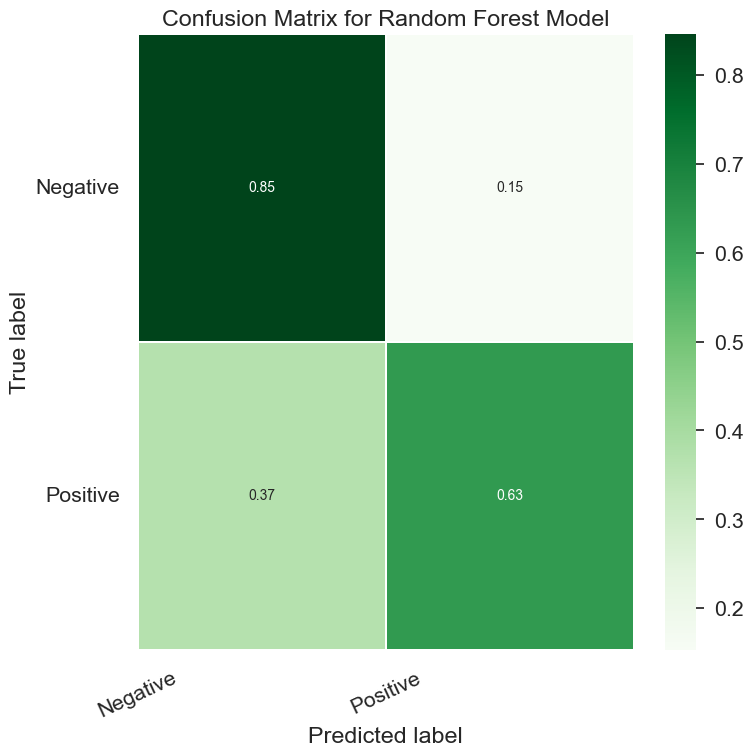

In [88]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get and reshape confusion matrix data
matrix = confusion_matrix(c, b)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
# Build the plot
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['Negative','Positive']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()